## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

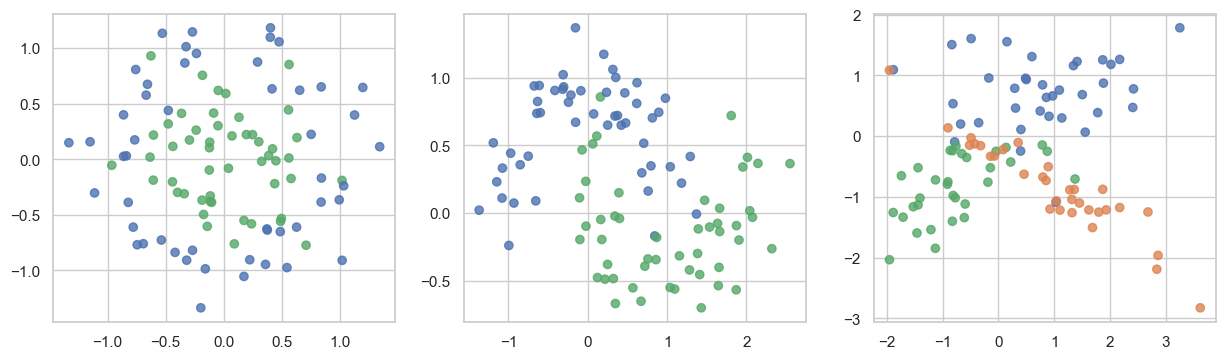

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

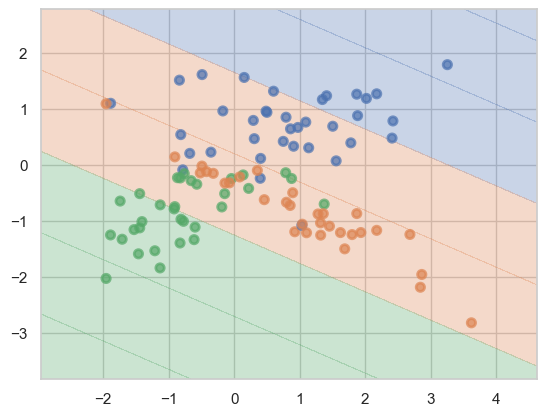

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Номер набора данных 0
Обучающая выборка: 1.0
Тестовая выборка: 0.75
Номер набора данных 1
Обучающая выборка: 1.0
Тестовая выборка: 0.95
Номер набора данных 2
Обучающая выборка: 1.0
Тестовая выборка: 0.7


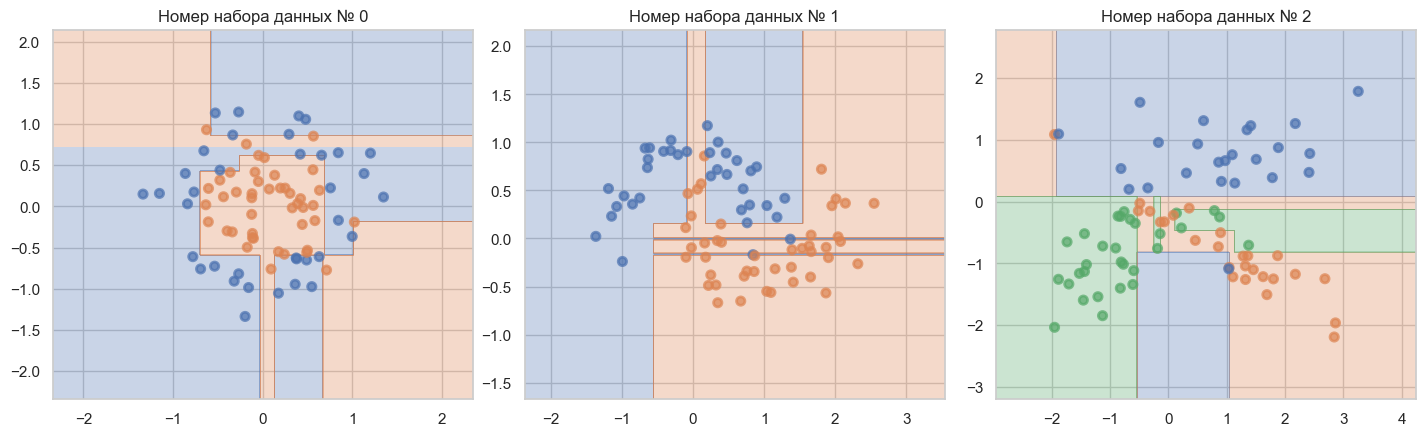

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
    tree = DecisionTreeClassifier().fit(x_train, y_train)
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('Номер набора данных № %i' %i)
    
    print('Номер набора данных', i)
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))

__Ответ:__ Точность обучающей выборке максимальна - 100%, но на тестовой она в каждом случае ниже. Следовательно, в данном примере я наблюдала сильное переобучение. Это также заметно на изображениях выше.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Рассмотрим различные размеры конечного узла для регуляризации методом деревьев min_samples_leaf - Минимальный размер конечного узла

ПРИМЕР №1 min_samples_leaf = 6

Номер набора данных 0
Обучающая выборка: 0.9125
Тестовая выборка: 0.9
Номер набора данных 1
Обучающая выборка: 0.9625
Тестовая выборка: 0.8
Номер набора данных 2
Обучающая выборка: 0.9
Тестовая выборка: 0.85


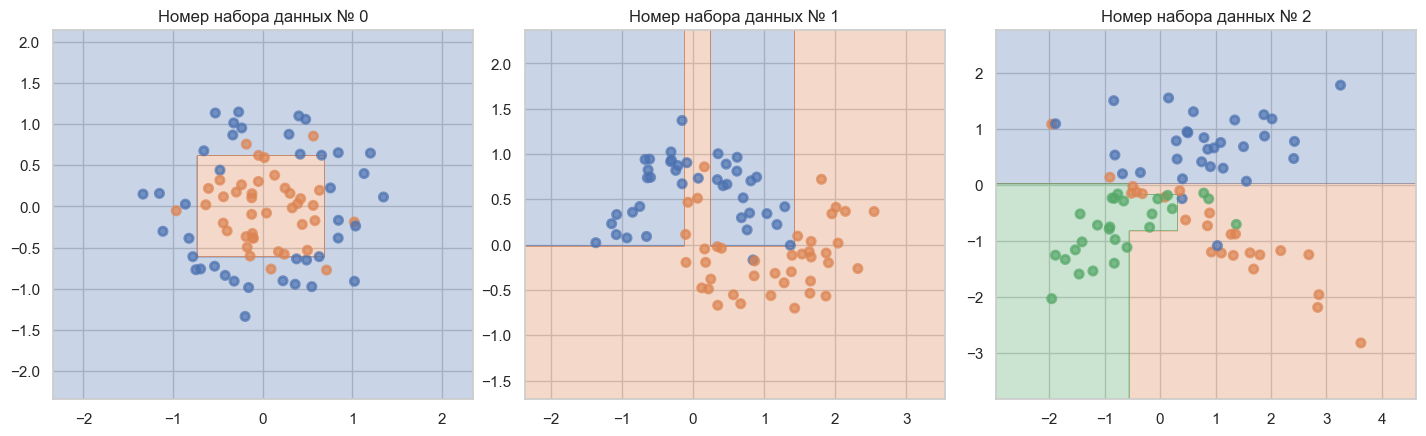

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    tree = DecisionTreeClassifier(min_samples_leaf=6).fit(x_train, y_train)
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('Номер набора данных № %i' %i)
    
    print('Номер набора данных', i)
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))

ПРИМЕР №2 min_samples_leaf = 2

Номер набора данных 0
Обучающая выборка: 0.9375
Тестовая выборка: 0.85
Номер набора данных 1
Обучающая выборка: 0.975
Тестовая выборка: 0.9
Номер набора данных 2
Обучающая выборка: 0.9375
Тестовая выборка: 0.8


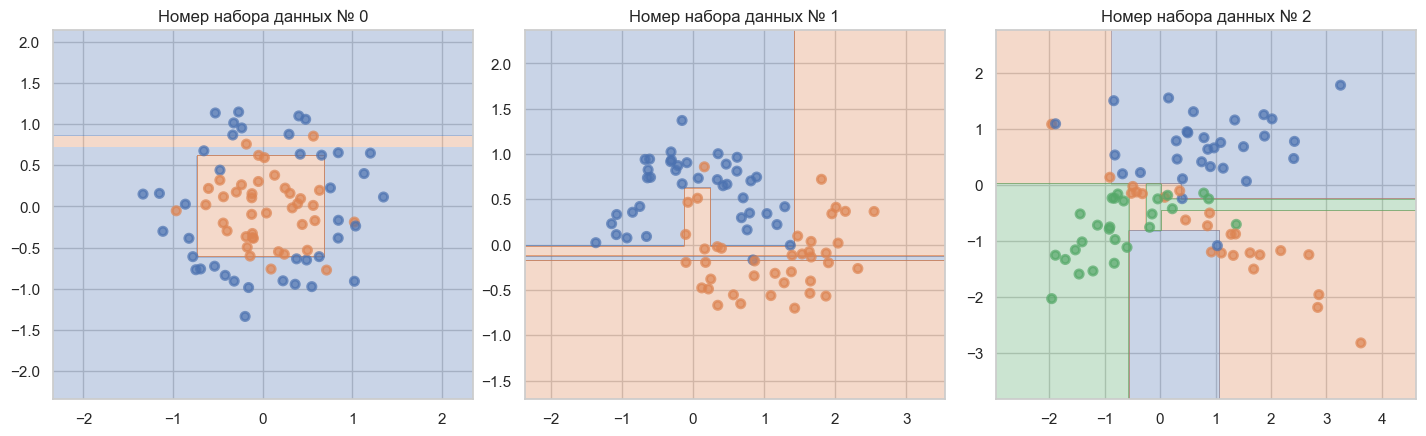

In [9]:
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    tree = DecisionTreeClassifier(min_samples_leaf=2).fit(x_train, y_train)
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('Номер набора данных № %i' %i)
    
    print('Номер набора данных', i)
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))

Рассмотрим различную максимальную глубину для регуляризации методом деревьев max_depth - максимальная глубина

ПРИМЕР №3 max_depth = 7

Номер набора данных 0
Обучающая выборка: 1.0
Тестовая выборка: 0.7
Номер набора данных 1
Обучающая выборка: 1.0
Тестовая выборка: 0.8
Номер набора данных 2
Обучающая выборка: 0.975
Тестовая выборка: 0.8


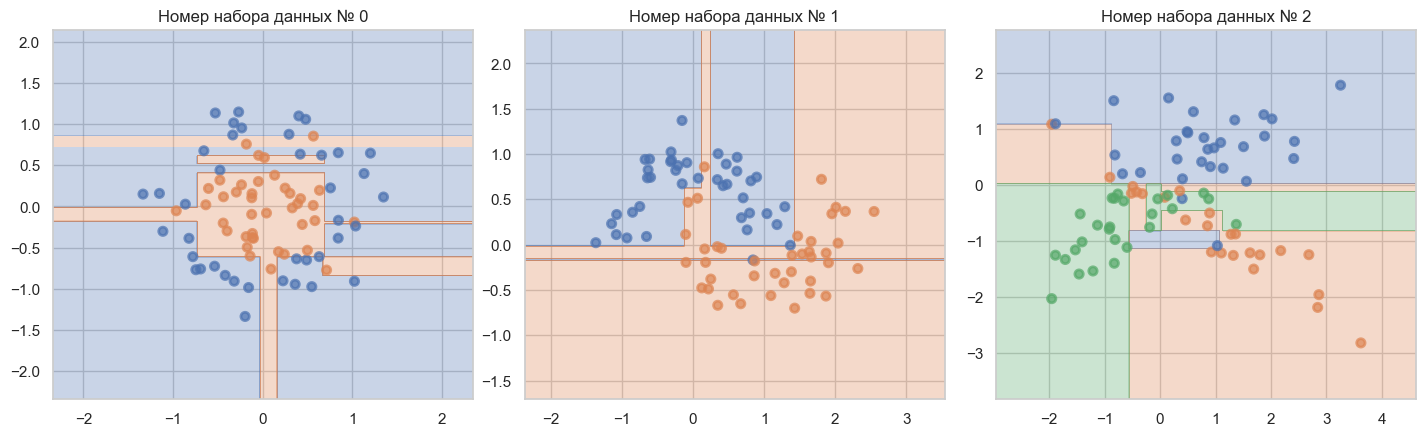

In [10]:
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    tree = DecisionTreeClassifier(max_depth=7).fit(x_train, y_train)
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('Номер набора данных № %i' %i)
    
    print('Номер набора данных', i)
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))

ПРИМЕР №4 max_depth = 20

Номер набора данных 0
Обучающая выборка: 1.0
Тестовая выборка: 0.7
Номер набора данных 1
Обучающая выборка: 1.0
Тестовая выборка: 0.8
Номер набора данных 2
Обучающая выборка: 1.0
Тестовая выборка: 0.8


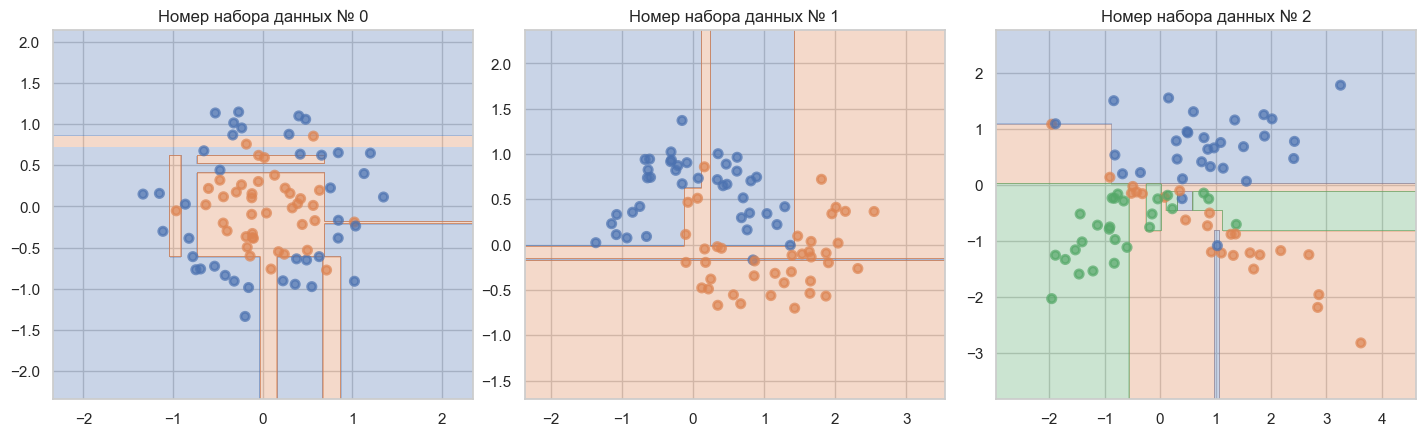

In [11]:
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    tree = DecisionTreeClassifier(max_depth=20).fit(x_train, y_train)
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('Номер набора данных № %i' %i)
    
    print('Номер набора данных', i)
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))

__Ответ:__ На приведенных выше рисунках видно, что увеличение максимально возможного числа объектов в листе и уменьшение максмально возможной глубины дерева приводит к неточным результатам. А точность вычислений снижается.

Для первой выборки (с простой формой разделения) самые точные результаты показаны при наибольшем min_samples_leaf и наименьшем значении max_depth.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [12]:
import numpy as np

def find_best_split(feature_vector, target_vector):
    sorted_ind = np.argsort(feature_vector)
    feat_sort = feature_vector[sorted_ind]
    target_sort = target_vector[sorted_ind]
    mask = feat_sort[1:] != feat_sort[:-1]
    threshold_vec = ((feat_sort[1:] + feat_sort[:-1]) / 2)[mask]

    R = np.size(target_sort)
    R_l_size = np.arange(1, R)
    R_l_1 = np.cumsum(target_sort)
    R_l_p1 = R_l_1[:-1] / R_l_size
    R_l_p0 = 1 - R_l_p1

    R_r_1 = R_l_1[-1] - R_l_1[:-1]
    R_r_p1 = R_r_1 / (R - R_l_size)
    R_r_p0 = 1 - R_r_p1

    gini_vec = R_l_size / R * (R_l_p0 ** 2 + R_l_p1 ** 2 - 1) + \
        (R - R_l_size) / R * (R_r_p0 ** 2 + R_r_p1 ** 2 - 1)
    gini_vec = gini_vec[mask]

    ind_best = np.argmax(gini_vec)
    threshold_best = threshold_vec[ind_best]
    gini_best = gini_vec[ind_best]

    return threshold_vec, gini_vec, threshold_best, gini_best

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [13]:
# pip install xlrd
import pandas as pd

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
students = pd.read_csv('students.csv')

In [15]:
students.head(5)

,Unnamed: 0,STG,SCG,STR,LPR,PEG,UNS
0,0,0.00,0.00,0.00,0.00,0.00,0
1,1,0.08,0.08,0.10,0.24,0.90,1
2,2,0.06,0.06,0.05,0.25,0.33,0
3,3,0.10,0.10,0.15,0.65,0.30,1
4,4,0.08,0.08,0.08,0.98,0.24,0


In [16]:
students.drop(columns=students.columns[0], axis= 1, inplace= True)

In [17]:
target = students['UNS']
features = students.drop(columns = 'UNS')

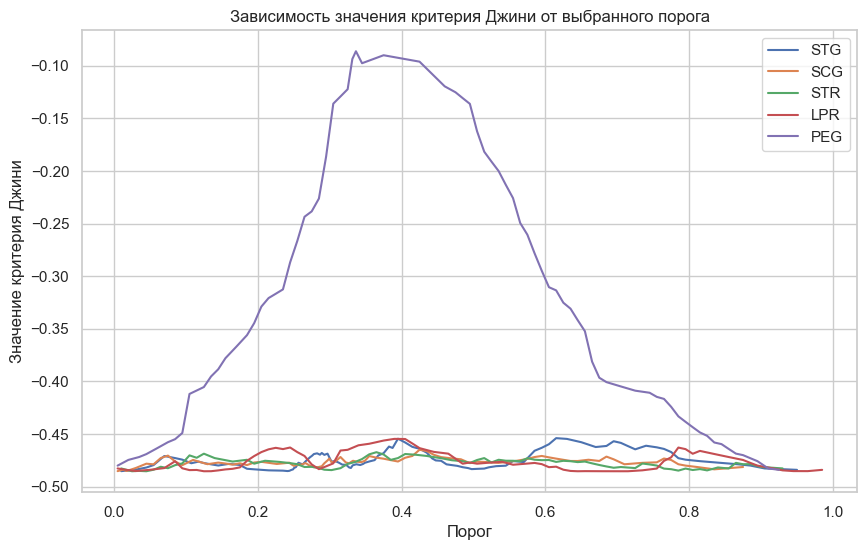

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.title('Зависимость значения критерия Джини от выбранного порога')
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')

for column_name in features.columns:
    thr, gini, thr_best, gini_best = find_best_split(features[column_name].values, target.values)
    plt.plot(thr, gini, label=column_name)
plt.legend()

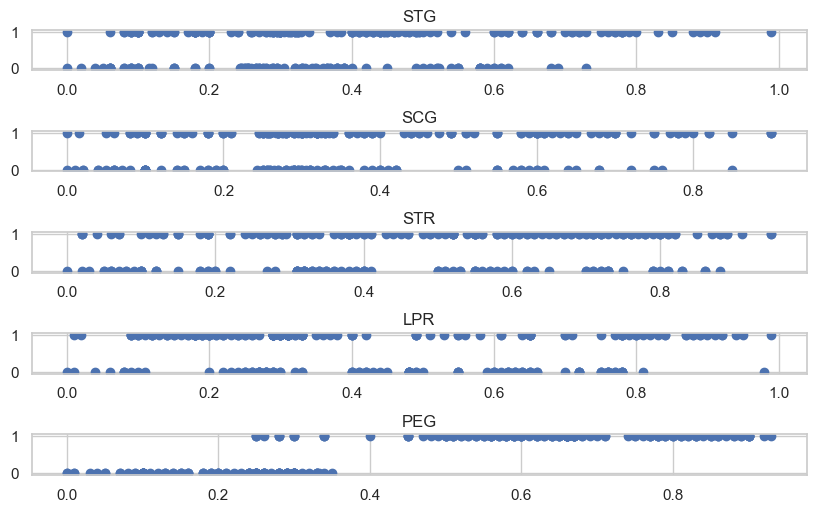

In [19]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, hspace=1.5)
for i, column_name in enumerate(features.columns):
    plt.subplot(5, 1, i + 1)
    plt.scatter(features[column_name].values, target.values)
    plt.title(column_name)

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

__ВЫВОД__

1.Из представленных выше графиков видно, что деление лучше всего производить по признаку 'PEG';

2.Граница на точечных графиках и на графике критерия Джини проходит примерно в одной точке 0.4

3.Кривая для "хороших" признаков имеет точку максимума. Кривые признаков, по которым деление практически невозможно, находятся в окрестности одной точки.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [20]:
from collections import Counter

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None,
                 min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical",
                           feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

#Реализация функции для вывода данных
    def get_params(self, deep=False):
        return {'feature_types': self._feature_types, 
               'max_depth': self._max_depth, 
               'min_samples_split': self._min_samples_split,
               'min_samples_leaf': self._min_samples_leaf}

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]): #убрали лишнюю 1 в range, range(1, sub_X.shape[1]):
            #print(feature, len(self._feature_types))
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():  # key - категория
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count  # по ключу лежит доля y=1 в категории
                    
                #Исправлены ошибки в двух строках:
                #sorted_categories = list(map(lambda x: x[1], sorted(ratio.items(), key=lambda x: x[1])))
                #categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))
                sorted_categories = sorted(ratio.keys(),
                                           key=lambda k: ratio[k])  #отсортировали категории по доле единиц
                categories_map = dict(zip(sorted_categories,
                                          range(len(sorted_categories))))  #по названию категории получаем ее порядковый номер
                #Удалила лишние обозначения в строке, 
                #feature_vector = np.array(map(lambda x: categories_map[x], sub_X[:, feature]))
                feature_vector = np.array([
                        categories_map[x] for x in sub_X[:, feature]])  #получили вектор порядковых номеров
            else:
                raise ValueError
            #Исправила условие, if len(feature_vector) == 3:
            if np.all(feature_vector == feature_vector[0]):
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(  #список подходящих категорий
                            map(lambda x: x[0], #берем первый элемент, то есть ключ - исходную категорию
                                filter(
                                        lambda x: x[1] < threshold,
                                        categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self.depth += 1 #Добавила self.depth
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(
                sub_X[np.logical_not(split)],
                sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        if(node['type'] == 'terminal'):
            return node['class']
        else:
            feature_type = self._feature_types[node['feature_split']]
            if(feature_type == 'real'):
                if(x[node['feature_split']] < node['threshold']):
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])
            else:
                if(x[node['feature_split']] in node['categories_split']):
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])

    def fit(self, X, y):
        self.depth = 1
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [21]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
mushrooms = pd.read_csv('agaricus-lepiota.data')

In [22]:
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

for col_name in mushrooms.columns:
    le = LabelEncoder()
    mushrooms.loc[:, col_name] = le.fit_transform(mushrooms.loc[:, col_name])
    

In [24]:
target = mushrooms['p']
features = mushrooms.drop(columns='p')
x_train, x_test, y_train, y_test = train_test_split(features.values, target.values,
                                                    test_size=0.5, random_state=127)

In [25]:
feature_types = ['categorical' for x in x_train]
my_tree = DecisionTree(feature_types)
my_tree.fit(x_train, y_train)
y_pred = my_tree.predict(x_test)
print('test accuracy =', np.sum(y_pred == y_test) / np.size(y_test))
y_pred = my_tree.predict(x_train)
print('train accuracy =', np.sum(y_pred == y_train) / np.size(y_train))
print('depth =', my_tree.depth)

test accuracy = 0.9997538158542589
train accuracy = 1.0
depth = 9


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [78]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [79]:
tic_tac_toe = pd.read_csv('tic-tac-toe.data')
cars = pd.read_csv('car.data')
nursery = pd.read_csv('nursery.data')

In [80]:
tic_tac_toe.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [81]:
tic_tac_toe.isnull().any().any()

False

In [82]:
cars.isnull().any().any()

False

In [83]:
nursery.isnull().any().any()

False

In [84]:
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [85]:
mask = (cars.loc[:, 'unacc'] == 'unacc').values
cars.loc[:, 'unacc'][mask] = 'acc'
mask = (cars.loc[:, 'unacc'] == 'vgood').values
cars.loc[:, 'unacc'][mask] = 'good'

In [86]:
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [87]:
mask = (nursery.loc[:, 'recommend'] == 'not_recom').values
nursery.loc[:, 'recommend'][mask] = 'recommend'
mask = (nursery.loc[:, 'recommend'] == 'very_recom').values
nursery.loc[:, 'recommend'][mask] = 'priority'
mask = (nursery.loc[:, 'recommend'] == 'spec_prior').values
nursery.loc[:, 'recommend'][mask] = 'priority'

In [88]:
def algs(feat, targ):
    result_dict = {}
    result_dict['real'] = [cross_val_score(DecisionTree(['real' for x in feat.columns]), 
                                          feat.values, targ, cv=10, scoring="accuracy").mean()]
    result_dict['cat'] = [cross_val_score(DecisionTree(['categorical' for x in feat.columns]), 
                                         feat.values, targ, cv=10, scoring="accuracy").mean()]
    feat_one_hot = OneHotEncoder(sparse=False).fit_transform(feat)
    result_dict['real + oh'] = [cross_val_score(DecisionTree(['real'] * feat_one_hot.shape[1]), 
                                       feat_one_hot, targ, cv=10, scoring="accuracy").mean()]
    result_dict['sklearn'] = [cross_val_score(DecisionTreeClassifier(), feat.values, targ, cv=10,
                                            scoring="accuracy").mean()]
    return result_dict

In [89]:
data_list = [mushrooms, tic_tac_toe, cars, nursery]
for dataset in data_list:
    for col_name in dataset.columns:
        le = LabelEncoder()
        dataset.loc[:, col_name] = le.fit_transform(dataset.loc[:, col_name])


In [90]:
feat_list = []
feat_list.append(mushrooms.drop(columns='p'))
feat_list.append(tic_tac_toe.drop(columns='positive'))
feat_list.append(cars.drop(columns='unacc'))
feat_list.append(nursery.drop(columns='recommend'))

In [91]:
targ_list = []
targ_list.append(mushrooms['p'].values)
targ_list.append(tic_tac_toe['positive'].values)
targ_list.append(cars['unacc'].values)
targ_list.append(nursery['recommend'].values)

In [92]:
rows_list = ['mushrooms', 'tictactoe', 'cars', 'nursery']
columns_list = ['real', 'cat', 'real + oh', 'sklearn']

In [38]:
# error_score='raise'

In [96]:
df = pd.DataFrame(columns=columns_list)
for i in range(4):
    curr_dict = algs(feat_list[i], targ_list[i])
    curr_dict['name'] = rows_list[i]
    df = df.append(curr_dict, ignore_index=True)
df.set_index('name')

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\79689\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\79689\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\79689\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\tree\_classes.py", line 224, in fit
    check_classification_targets(y)
  File "C:\Users\79689\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\multiclass.py", line 218, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'unknown'


In [94]:
# df = pd.DataFrame(columns=columns_list)
# for i in range(4):
#     curr_dict = algs(feat_list[i], targ_list[i])
#     curr_dict['name'] = rows_list[i]
#     print(curr_dict)
#     df = df.concat(curr_dict, ignore_index=True)
#     df.add(curr_dict)
# df.set_index('name')
# df

__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** На всех датасетах, кроме tic_tac_toe, точность высокая. Я думаю, что точность в нем ниже, так как классы несбалансированы.

Для остальных датасетов лучший результат достинут при передаче признаков дереву как категориальных. Так как на них не задано отношение порядка, поэтому их нельзя расценивать как вещественные